In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install PyDrive
!git clone https://github.com/LeCrunchic/colablib
  
from colablib.utilities import *

    100% |████████████████████████████████| 993kB 7.9MB/s 
  Running setup.py bdist_wheel for PyDrive ... - done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive
Cloning into 'colablib'...
remote: Counting objects: 26, done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [0]:
get_file('1_g4hLq3Roxt5nKsLzO8PH7EwtVIrXliy', 'survey.csv')
data = pd.read_csv('survey.csv')

## Pre-Lab

1.  Who is happier at the beginning of the semester:  under-classmen or upper-classmen?
2.  Does student happiness change from the beginning of the semester to the end?

Formulas for two sample means independent t-test.

$SE_{\bar{x}_1-\bar{x}_2} = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} \\
t = \frac{(\bar{x}_1-\bar{x}_2) - (\mu_1-\mu_2)}{SE_{\bar{x}_1-\bar{x}_2}} \\
df = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{1}{n_1-1}(\frac{s_1^2}{n_1})^2 + \frac{1}{n_2-1}(\frac{s_2^2}{n_2})^2}
$

In [0]:
def stderr_2means(s1, s2, n1, n2):
    stderr = np.sqrt( (s1**2 / n1) + (s2**2 / n2 ) )
    return stderr
    
def tstat_2means(mudiff, xbardiff, stderr):
    t = ( (xbardiff) - (mudiff) ) / stderr
    return t
  
def DF(s1, s2, n1, n2):
    numerator = ((s1**2 / n1) + (s2**2 / n2))**2
    denominator = ((s1**2 / n1)**2 / (n1 - 1)) + ((s2**2 / n2)**2 / (n2 - 1))
    df = numerator / denominator
    return df

### Independent t-test

In [0]:
upperClass = data[data.classification.apply(lambda v: (v == 'Junior') | (v == 'Senior'))].copy()
underClass = data[data.classification.apply(lambda v: (v == 'Freshman') | (v == 'Sophomore'))].copy()

happynessUpper = upperClass.happy
happynessUnder = underClass.happy

happUpMean = happynessUpper.mean()
happUpStd = happynessUpper.std(ddof=1)

happUnMean = happynessUnder.mean()
happUnStd = happynessUnder.std(ddof=1)

In [68]:
print('upper-class happy mean:', happUpMean)
print('under-class happy mean:', happUnMean)

upper-class happy mean: 78.3
under-class happy mean: 79.67213114754098


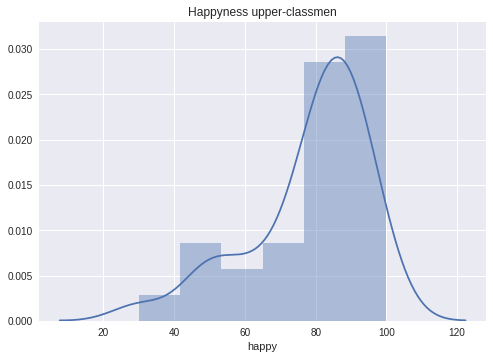

In [69]:
plt.title('Happyness upper-classmen')
sns.distplot(happynessUpper)

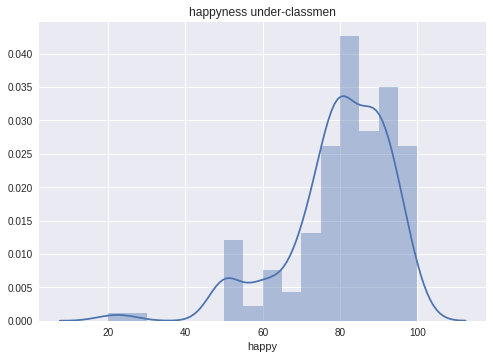

In [71]:
plt.title('happyness under-classmen')
sns.distplot(happynessUnder)

In [72]:
# da test

indep_stderr = stderr_2means(happUnStd, happUpStd, len(happynessUnder), len(happynessUpper))
indep_tstat = tstat_2means(0, happUnMean-happUpMean, indep_stderr)

print('t:', indep_tstat)

# FAIL TO REJECT

t: 0.42302412288024344


### Dependent t-test

In [0]:
happynessDiff = data['happy'] - data['post_happy']

diffMean = happynessDiff.mean()
diffStd = happynessDiff.std(ddof=1)

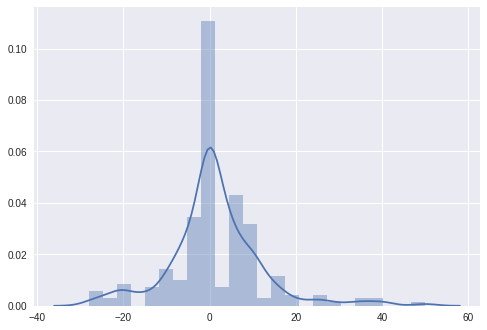

In [74]:
sns.distplot(happynessDiff)

In [77]:
depen_stderr = diffStd / np.sqrt(214)
depen_tstat = tstat_2means(0, diffMean, depen_stderr)

print('t:', depen_tstat)

# FAIL TO REJECT

t: 1.6838243198311555


## Lab
1. Do students at UT spend more time on homework per week in college than they did in high school?
2. Do students in fraternities and sororities get less sleep on the weekends than other college students? 

### 1

In [91]:
studyHoursHS = data.hw_hours_HS.copy()
studyHoursUT = data.hw_hours_college.copy()

hoursHSmean = studyHoursHS.mean(); hoursHSstd = studyHoursHS.std(ddof=1)
hoursUTmean = studyHoursUT.mean(); hoursUTstd = studyHoursUT.std(ddof=1)

print('highschool study time mean:', hoursHSmean)
print('college study time mean:', hoursUTmean)

highschool study time mean: 8.572429906542055
college study time mean: 19.518691588785046


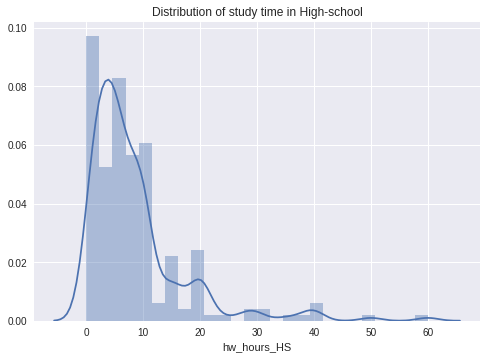

In [84]:
plt.title('Distribution of study time in High-school')
sns.distplot(studyHoursHS)

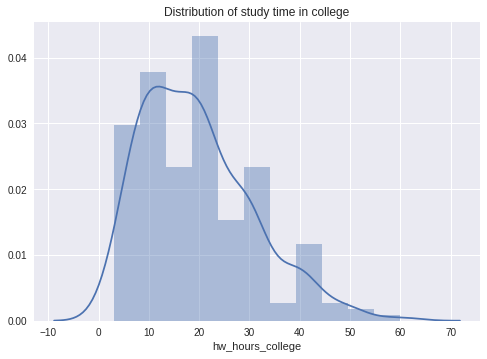

In [83]:
plt.title('Distribution of study time in college')
sns.distplot(studyHoursUT)

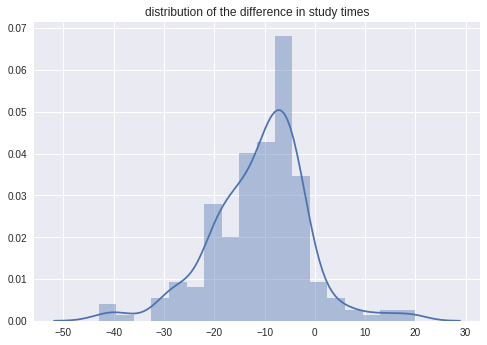

In [118]:
plt.title('distribution of the difference in study times')
sns.distplot(studyHoursHS - studyHoursUT)

In [99]:
# parameters for conducting t test
studyHours_diff = studyHoursHS - studyHoursUT

studyHours_diff_mean = studyHours_diff.mean()
studyHours_diff_std = studyHours_diff.std(ddof=1)
studyHours_diff_stderr = studyHours_diff_std / np.sqrt(len(data))

# da test
studyHours_tstat = studyHours_diff_mean / studyHours_diff_stderr

print('t:', studyHours_tstat)

# REJECT NULL HYPOTHESIS

t: -16.811516775929036


In [98]:
studyHours_diff_mean

-10.94626168224299

### 2

In [0]:
GLOStudents = data[data.greek == 'yes']
nonGLOStudents = data[data.greek == 'no']

greekSleep_mean = GLOStudents.sleep_Sat.mean()
nonGreekSleep_mean = nonGLOStudents.sleep_Sat.mean()

greekSleep_std = GLOStudents.sleep_Sat.std(ddof=1)
nonGreekSleep_std = nonGLOStudents.sleep_Sat.std(ddof=1)

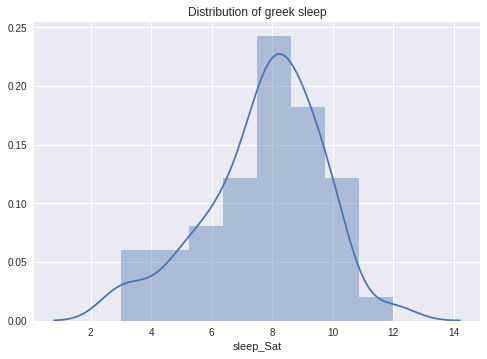

In [116]:
plt.title('Distribution of greek sleep')
sns.distplot(GLOStudents.sleep_Sat)

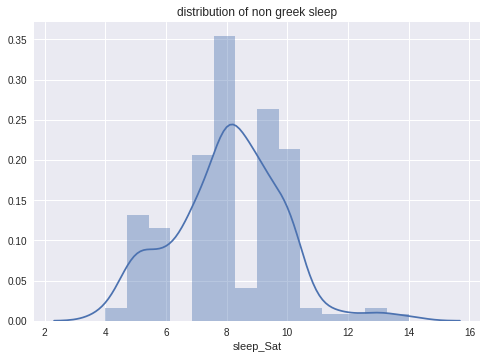

In [117]:
plt.title('distribution of non greek sleep')
sns.distplot(nonGLOStudents.sleep_Sat)

In [0]:
sleepHours_stderr = stderr_2means(greekSleep_std, nonGreekSleep_std, len(GLOStudents), len(nonGLOStudents))
sleepHours_tstat = tstat_2means(0, greekSleep_mean - nonGreekSleep_mean, sleepHours_stderr)

In [106]:
print('t:', sleepHours_tstat)

# FAIL TO REJECT

t: -0.9807735842976075


## Problem Set

### Q1
Is the increase in time spent studying from high school to college the same for nursing majors and biology majors?  

In [0]:
biologists = data[data.major.apply(lambda m: m == 'Biology')]
nurses = data[data.major.apply(lambda m: m == 'Nursing')]

In [9]:
biologists.columns

Index(['ID', 'gender', 'age', 'classification', 'happy', 'sleep_Tues',
       'sleep_Sat', 'hair_color', 'exclusive', 'greek', 'smoke', 'talking_min',
       'texts_sent', 'live_campus', 'roomates', 'austin', 'commute',
       'UT_sport', 'major', 'hw_hours_HS', 'hw_hours_college', 'post_happy',
       'post_exclusive', 'post_smoke', 'post_talking_min', 'post_text_sent'],
      dtype='object')

In [0]:
hoursDiff_bios = biologists.hw_hours_college - biologists.hw_hours_HS
hoursDiff_nurs = nurses.hw_hours_college - nurses.hw_hours_HS

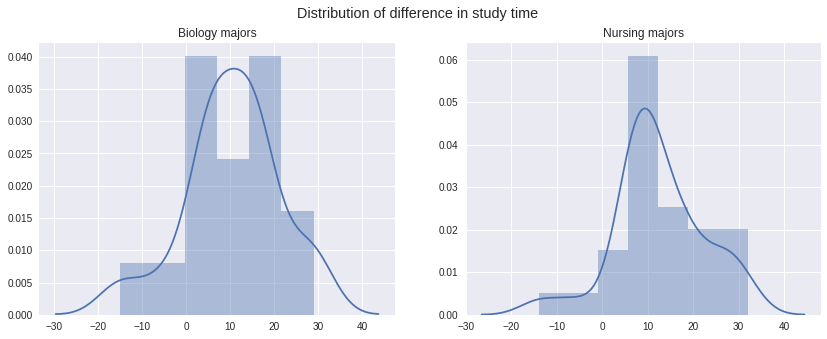

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

fig.suptitle('Distribution of difference in study time')

ax[0].set_title('Biology majors')
sns.distplot(hoursDiff_bios, ax=ax[0])

ax[1].set_title('Nursing majors')
sns.distplot(hoursDiff_nurs, ax=ax[1])

In [48]:
nurs_mean = hoursDiff_nurs.mean()
nurs_std = hoursDiff_nurs.std(ddof=1)

bios_mean = hoursDiff_bios.mean()
bios_std = hoursDiff_bios.std(ddof=1)

stderr_q1 = stderr_2means(nurs_std, bios_std, len(nurses), len(biologists))
t_q1 = tstat_2means(0, nurs_mean - bios_mean, stderr_q1)

print('df =', DF(nurs_std, bios_std, len(nurses), len(biologists)))
print('t =', t_q1)

df = 30.886032058639
t = 0.6230116314510536


### Q2

In [0]:
nonSmoker_size = 32
smoker_size = 26

nonSmoker_mean = 74
smoker_mean = 80

nonSmoker_std = 5
smoker_std = 6

In [52]:
stderr_q2 = stderr_2means(nonSmoker_std, smoker_std, nonSmoker_size, smoker_size)
print('stderr:', stderr_q2)
print('t:', tstat_2means(0, smoker_mean - nonSmoker_mean, stderr_q2))

stderr: 1.4716879372392044
t: 4.076951266758107


### Q3
Some nerve cells have the ability to regenerate. Researchers think that these cells may generate creatine phosphate (CP) to stimulate new cell growth.
To test this hypothesis, researchers cut the nerves emanating from the left side of the spinal cord in a sample of rhesus monkeys, while the nerves on the right side were kept intact.  They then compared the CP levels (mg/100g) in nerve cells on both sides. 

In [55]:
left_side = np.array([16.3, 4.8, 10.7, 14., 15.7, 9.9, 29.3, 20.4, 
                      15.7, 7.6, 16.2, 14.7, 15., 8.4, 23.3, 17.7])

right_side = np.array([11.5, 3.5, 12.8, 7.9, 15.2, 9.8, 24., 14.9, 
                       12.6, 8.2, 8.4, 11., 12.5, 9.2, 17.5, 11.1])

sidesDifferences = left_side - right_side

sidesDiffMean = sidesDifferences.mean()
sidesDiffStd = sidesDifferences.std(ddof=1)

print('Mean:', sidesDiffMean)
print('STD:', sidesDiffStd)

Mean: 3.0999999999999996
STD: 3.052649122756604


In [58]:
stderr_q3 = sidesDiffStd / np.sqrt(16)
t_q3 = (sidesDiffMean - 0) / stderr_q3

print('stderr:', stderr_q3)
print('t:', t_q3)

stderr: 0.763162280689151
t: 4.062045620494551


In [59]:
def confidence_interval(mean, stderr, z=1.96):
    """Calculates confidence interval with 95% confidence by default"""
    upperBound = (mean + z * stderr,)
    lowerBound = (mean - z * stderr,)
    return lowerBound + upperBound
  
print('95% confidence interval:', confidence_interval(sidesDiffMean, stderr_q3))

95% confidence interval: (1.6042019298492636, 4.595798070150735)
